UPPER CONFIDENCE BOUND

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


In [131]:
dataset=pd.read_csv('Ads_CTR_Optimisation.csv')

IMPLEMENTING UCB


In [132]:
#STEP 1
N=10000
d=10
ads_selected=[]
number_of_selection=[0]*d #each index is for one ad, and stores the no of times it is selected upto round n
sum_of_reward=[0]*d #it is the sum of rewards for each ad, each index is for an ad
total_reward=0

In [133]:
#iterates through the users/round
for n in range(0,N):
    ad=0
    max_ucb=0
    #iterates through the ads
    for i in range(0,d):
        #STEP 2 
        #find the ucb if ad is already selected
        if(number_of_selection[i]>0):
            avg_reward=sum_of_reward[i]/number_of_selection[i]  #(Ri(n)/Ni(n))
            delta_i=math.sqrt(3/2*math.log(n+1)/number_of_selection[i])# delta i =sqrt(3/2 * log(n+1)/Ni(n)) (n+1 because at 0 exp is not defind i.e. div by 0)
            ucb=avg_reward+delta_i
        # find ucb id ad is not selected yet
        else:
            ucb=1e400 #ucb is assigned with a very large value which compell it to be selected beacuse ad with max ucb is selected
        #STEP 3
        #if ucb is greater than the existing max_ucb then update it and select the ad because it has ucb greater than max_ucb which means it has the highest ucb
        if(ucb>max_ucb):
            max_ucb=ucb
            ad=i
    ads_selected.append(ad) #appended the selected ad
    number_of_selection[ad]+=1 #inc ad i selection count
    sum_of_reward[ad]+= dataset.values[n%10000,ad] 
    total_reward+=dataset.values[n%10000,ad]

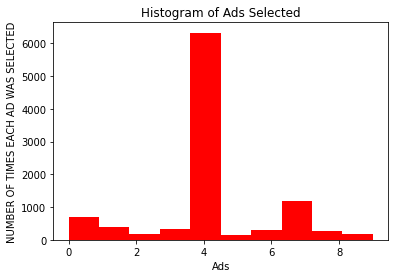

In [134]:
plt.hist(ads_selected, color='red')
plt.title("Histogram of Ads Selected")
plt.xlabel("Ads")
plt.ylabel("NUMBER OF TIMES EACH AD WAS SELECTED")
plt.show()